In [20]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# File names of the four data sets
df = pd.read_csv('WHR2018Chapter2OnlineData.csv')
df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


In [22]:
#I have chosen the World Happiness Report (WHR) dataset. I will be predicting the score of "Life Ladder", and the label is the happiness level in the country for every year. This is a supervised learning problem due to the historical data and a regression problem since "Life Ladder" provides numerical values. The features are Country, Year, Life Ladder, Log GDP per capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Positive affect, Negative affect, Confidence in national government, Democratic Quality, Delivery Quality, Standard deviation of ladder by country-year, Standard deviation/Mean of ladder by country-year, GINI index (World Bank estimate), GINI index (World Bank estimate), average 2000–15, Gini of household income reported in Gallup, by wp5-year. This is an important problem because it helps identify the social situation of countries and the economic or political factors that affect that and world happiness. A company would create value with a model that predicts this label by utilizing this research to target world factors that need improvement and do something about them in order to meet the needs of people.

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

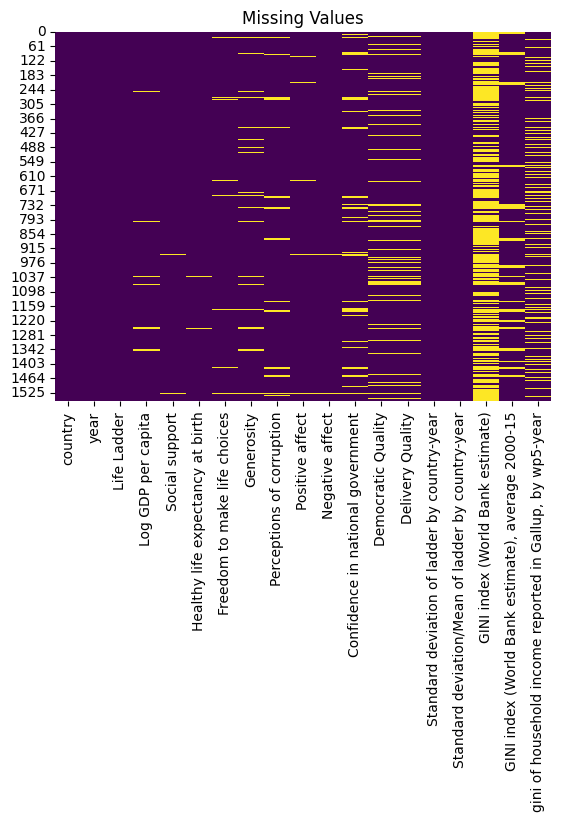

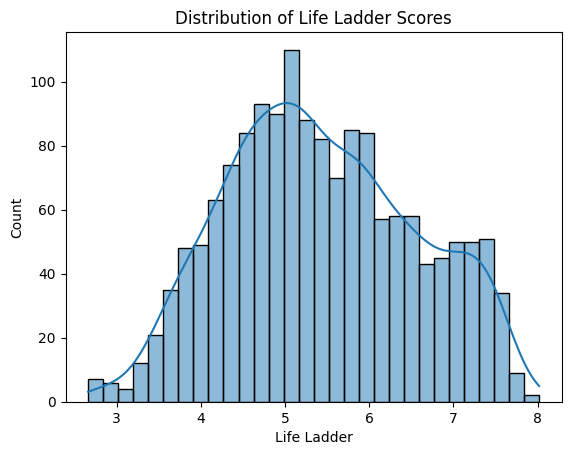

In [23]:
# YOUR CODE HERE
print(df.isnull().sum())
print(df.sample(3))
df.dtypes
df.describe()

sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

sns.histplot(df['Life Ladder'], bins=30, kde=True)
plt.title('Distribution of Life Ladder Scores')
plt.show()

In [24]:
#Yes, I have a new feature list because I plan to remove features that have a lot of missing values, such as the GINI index, as they would not be as useful for making conclusions. This way, I can keep features like Social Support, which include all or most values, making it easier to analyze. Different data preparation techniques that I will use to prepare my data for modeling include replacing missing values that may still exist, despite the new feature list, with the mean of each column to get closer to a conclusion. Other techniques will include dealing with outliers and removing them if appropriate. Since this is a regression problem, my models will be Linear Regression and Random Forest Regressor to predict the label. My plan to train my model is to split the data into train and test sets, analyze its performance by training the model on the training data, and then improving the model through the test data utilizing MSE and R^2 score. I can further use the results to adjust the hyperparameters and notice is other regression models may generalize better to new data.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [26]:
# YOUR CODE HERE
# Prepare data
features = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption',
            'Positive affect', 'Negative affect', 'Confidence in national government',
            'Democratic Quality', 'Delivery Quality']

df_model = df[features + ['Life Ladder']].dropna()

X = df_model[features]
y = df_model['Life Ladder']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [27]:
# Fit and evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("LR MSE:", mean_squared_error(y_test, y_pred_lr))
print("LR R²:", r2_score(y_test, y_pred_lr))

# Fit and evaluate Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF MSE:", mean_squared_error(y_test, y_pred_rf))
print("RF R²:", r2_score(y_test, y_pred_rf))

LR MSE: 0.32446492153676826
LR R²: 0.7578530837120323
RF MSE: 0.14982657491135848
RF R²: 0.888185006499501


In [28]:
#The Linear Regression model got an MSE of around 0.32 and an R² of about 0.76, which means it explained around 76% of the variance in the Life Ladder scores. The Random Forest model performed better, with a lower MSE of about 0.15 and a higher R² of roughly 0.89, so it captured about 89% of the variance. So this shows that the Random Forest model fits the data more accurately and makes better predictions compared to Linear Regression.

In [29]:
# Improve
feature_importance = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=False)
top_features = feature_importance.index[:3]

X_top = df_model[top_features]
X_top_scaled = scaler.fit_transform(X_top)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_scaled, y, test_size=0.2, random_state=42)

# Refit w top features
rf_top = RandomForestRegressor()
rf_top.fit(X_train_top, y_train_top)
y_pred_rf_top = rf_top.predict(X_test_top)

print("\nImproved Random Forest:")
print("MSE:", mean_squared_error(y_test_top, y_pred_rf_top))
print("R²:", r2_score(y_test_top, y_pred_rf_top))


Improved Random Forest:
MSE: 0.19688590027389394
R²: 0.8530648139524655


In [30]:
#After doing feature selection and keeping only the top 3 features, the improved Random Forest got an MSE of about 0.19 and an R² of around 0.86. The performance is slightly lower compared to using all features, and the model explains a bit less of the variance. But it’s still performing well, and the model became simpler and easier to interpret by focusing on the most important features.